In [ ]:
# --- CELL 1: SETUP ---
from google.colab import drive
import os

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Thiết lập biến môi trường CUDA (Bắt buộc cho GroundingDINO)
os.environ["CUDA_HOME"] = "/usr/local/cuda"
os.environ["BUILD_WITH_CUDA"] = "1"
os.environ["TORCH_CUDA_ARCH_LIST"] = "7.5 8.0 8.6"

# 3. Cài đặt Ninja và sửa lỗi Numpy version (Mã 6)
!pip install -q ninja
# Cài đặt đồng bộ bộ 3 thư viện tương thích với nhau
!pip install "numpy<2.0" "scipy<1.13" "matplotlib==3.7"

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 21.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 120.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 11.6 MB/s eta 0:00:00
  Created wheel for matplotlib: filename=matplotlib-3.7.0-cp312-cp312-linux_x86_64.whl size=11091115 sha256=1a93800d091716ee1e9883acb7817fdd0e9623a011dbe1b685d411c1a4c76280
  Stored in directory: /root/.cache/pip/wheels/b8/6d/92/e1f524b34cb5f0fda14c19ad64ac2a73095c763004432e45a1
Successfully built matplotlib
  Attempting uninstall: numpy
    Found existing

In [ ]:
import os

# --- CẤU HÌNH ĐƯỜNG DẪN ---
drive_path = "/content/drive/MyDrive/DIS5K.zip"
colab_zip_path = "/content/DIS5K.zip"  # Đường dẫn file zip tạm trên Colab
dataset_dir = "/content/DIS5K"         # Thư mục đích sau khi giải nén
gdown_id = "1O1eIuXX1hlGsV7qx4eSkjH231q7G1by1" # Google Drive ID cho DIS5K.zip

# --- LOGIC XỬ LÝ ---

# 1. Kiểm tra xem thư mục đích đã tồn tại và KHÔNG RỖNG chưa
if os.path.exists(dataset_dir) and len(os.listdir(dataset_dir)) > 0:
    print(f"✅ Phát hiện thư mục dataset: {dataset_dir}")
    print(f"📂 Thư mục chứa {len(os.listdir(dataset_dir))} file/folder.")
    print("⏭️  BỎ QUA bước giải nén để tiết kiệm thời gian. Nếu bạn muốn tải lại, vui lòng xóa thư mục này trước.")

else:
    print("running...")
    # 2. Nếu chưa có dataset, tiến hành Copy, Download hoặc Giải nén
    downloaded_zip_available = False
    if not os.path.exists(colab_zip_path):
        # Ưu tiên copy từ Google Drive cá nhân trước
        if os.path.exists(drive_path):
            print(f"Found file on Drive: {drive_path}")
            print("⏳ Đang copy file từ Drive sang Colab (vui lòng chờ)...")
            !cp "{drive_path}" "{colab_zip_path}"
            downloaded_zip_available = True
        else:
            # Nếu không tìm thấy trên Drive cá nhân, tải trực tiếp bằng gdown
            print(f"❌ Không tìm thấy file tại: {drive_path} trên Google Drive cá nhân.")
            print(f"⏳ Đang tải file DIS5K.zip trực tiếp từ Google Drive (ID: {gdown_id})...")
            !gdown --id "{gdown_id}" -O "{colab_zip_path}"
            downloaded_zip_available = True
    else:
        print(f"File zip đã có sẵn tại: {colab_zip_path}")
        downloaded_zip_available = True

    if downloaded_zip_available:
        print("⏳ Đang giải nén...")
        !mkdir -p "{dataset_dir}"

        # Giải nén
        !unzip -q "{colab_zip_path}" -d "{dataset_dir}"

        print(f"✅ Hoàn tất! Dataset đã sẵn sàng tại: {dataset_dir}")

        # (Tùy chọn) Xóa file zip sau khi giải nén cho nhẹ máy
        # os.remove(colab_zip_path)
    else:
        print("❌ LỖI: Không thể tìm thấy hoặc tải xuống file dataset.")

running...
❌ Không tìm thấy file tại: /content/drive/MyDrive/DIS5K.zip trên Google Drive cá nhân.
⏳ Đang tải file DIS5K.zip trực tiếp từ Google Drive (ID: 1O1eIuXX1hlGsV7qx4eSkjH231q7G1by1)...
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1O1eIuXX1hlGsV7qx4eSkjH231q7G1by1
From (redirected): https://drive.google.com/uc?id=1O1eIuXX1hlGsV7qx4eSkjH231q7G1by1&confirm=t&uuid=0cd5bb29-19d6-4add-92d7-783b3548d730
To: /content/DIS5K.zip
100% 5.68G/5.68G [04:02<00:00, 23.5MB/s]
⏳ Đang giải nén...
✅ Hoàn tất! Dataset đã sẵn sàng tại: /content/DIS5K


In [ ]:
# --- CELL 2: INSTALL LIBRARIES (RENAMED FOLDER) ---
import os

# Tên thư mục mới (Sử dụng tên này để không bị trùng với tên thư viện 'sam2')
REPO_DIR = "/content/sam2_repo"

print(f"🚀 Bắt đầu cài đặt vào thư mục: {REPO_DIR}")

# 1. Clone SAM 2 vào thư mục tên mới
if not os.path.exists(REPO_DIR):
    print(f"⏳ Đang clone SAM 2...")
    # Cú pháp: git clone <URL> <TÊN_THƯ_MỤC_MỚI>
    !git clone https://github.com/facebookresearch/sam2.git {REPO_DIR}

    # Cài đặt SAM 2
    %cd {REPO_DIR}
    print("⏳ Đang cài đặt SAM 2 (Editable mode)...")
    !pip install -e .
else:
    print("✅ SAM 2 repo đã tồn tại.")


# 2. Cài đặt GroundingDINO (Nằm bên trong sam2_repo luôn)
GD_DIR = os.path.join(REPO_DIR, "GroundingDINO")

# Chỉ clone nếu chưa có
if not os.path.exists(GD_DIR):
    print("⏳ Đang clone GroundingDINO...")
    %cd {REPO_DIR}
    !git clone https://github.com/IDEA-Research/GroundingDINO.git

# Kiểm tra xem đã cài đặt thư viện chưa (check folder egg-info)
if os.path.exists(os.path.join(GD_DIR, "GroundingDINO.egg-info")):
    print("✅ GroundingDINO đã được biên dịch xong. Bỏ qua.")
else:
    %cd {GD_DIR}

    # Patch lỗi code C++ (Bắt buộc cho Colab T4)
    !sed -i 's/value.type()/value.scalar_type()/g' groundingdino/models/GroundingDINO/csrc/MsDeformAttn/ms_deform_attn_cuda.cu
    !sed -i 's/value.scalar_type().is_cuda()/value.is_cuda()/g' groundingdino/models/GroundingDINO/csrc/MsDeformAttn/ms_deform_attn_cuda.cu

    print("⏳ Đang biên dịch GroundingDINO (Mất khoảng 3-5 phút)...")
    !pip install -e .
    !pip install --upgrade transformers accelerate


# 3. QUAN TRỌNG: Fix lỗi xung đột version (Chạy cuối cùng)
print("🔧 Đang ép kiểu về Numpy 1.x và Scipy cũ để tránh lỗi...")
!pip install --upgrade --force-reinstall "numpy<2.0" "scipy<1.13" "matplotlib==3.7"

print(f"\n✅ CÀI ĐẶT HOÀN TẤT TẠI: {REPO_DIR}")
print("👉 QUAN TRỌNG: Hãy vào menu 'Runtime' -> 'Restart session' NGAY BÂY GIỜ.")

🚀 Bắt đầu cài đặt vào thư mục: /content/sam2_repo
⏳ Đang clone SAM 2...
Cloning into '/content/sam2_repo'...
remote: Enumerating objects: 1070, done.
remote: Total 1070 (delta 0), reused 0 (delta 0), pack-reused 1070 (from 1)
Receiving objects: 100% (1070/1070), 128.11 MiB | 16.62 MiB/s, done.
Resolving deltas: 100% (380/380), done.
/content/sam2_repo
⏳ Đang cài đặt SAM 2 (Editable mode)...
Obtaining file:///content/sam2_repo
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 14.8 MB/s eta 0:00:00
  Building editable for SAM-2 (pyproject.toml) ... done
  Created wheel for SAM-2: filename=sam_2-1.0-0.editable-cp312-cp312-linux_x86_64.whl size=13855 sha256=

🔧 Đang ép kiểu về Numpy 1.x và Scipy cũ để tránh lỗi...
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.12.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached matplotlib-3.7.0-cp312-cp312-linux_x86_64.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 10.6 MB/s eta 0:00:00
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
Using cached scipy-1.12.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.6/362.6 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.2 MB/s eta 0:00:00
Using cached packaging-25.0-py3-none-any.whl (66 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0


✅ CÀI ĐẶT HOÀN TẤT TẠI: /content/sam2_repo
👉 QUAN TRỌNG: Hãy vào menu 'Runtime' -> 'Restart session' NGAY BÂY GIỜ.


In [ ]:
# --- CELL 3: DOWNLOAD WEIGHTS (Cập nhật đường dẫn mới) ---
import os

# Đường dẫn mới
REPO_DIR = "/content/sam2_repo"
%cd {REPO_DIR}

!mkdir -p checkpoints

# 1. SAM 2 Weights
!wget -nc -P checkpoints https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_tiny.pt

# 2. GroundingDINO Weights
GD_WEIGHT_DIR = os.path.join(REPO_DIR, "GroundingDINO/weights")
if not os.path.exists(GD_WEIGHT_DIR):
    os.makedirs(GD_WEIGHT_DIR)

!wget -nc -O {GD_WEIGHT_DIR}/groundingdino_swint_ogc.pth https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

print("✅ Đã tải weights vào thư mục sam2_repo!")

/content/sam2_repo
--2025-12-16 13:19:20--  https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_tiny.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.35.37.84, 13.35.37.123, 13.35.37.111, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.35.37.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155906050 (149M) [application/vnd.snesdev-page-table]
Saving to: ‘checkpoints/sam2_hiera_tiny.pt’

sam2_hiera_tiny.pt  100%[===================>] 148.68M   138MB/s    in 1.1s    

2025-12-16 13:19:21 (138 MB/s) - ‘checkpoints/sam2_hiera_tiny.pt’ saved [155906050/155906050]

--2025-12-16 13:19:21--  https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercon

In [ ]:
# --- CELL 4: LOAD SAM 2 MODEL (NO BFLOAT16) ---
import torch
import os
import sys

# Đảm bảo đứng ở thư mục gốc
%cd /content

from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor

# 1. SETUP DEVICE
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# --- ĐOẠN SỬA LỖI: ĐÃ XÓA autocast BFloat16 ---
# GroundingDINO không chạy được BFloat16, nên ta dùng Float32 mặc định (an toàn nhất)
if device.type == "cuda":
    if torch.cuda.get_device_properties(0).major >= 8:
        torch.backends.cuda.matmul.allow_tf32 = True
        torch.backends.cudnn.allow_tf32 = True

# 2. CẤU HÌNH ĐƯỜNG DẪN
CHECKPOINT_PATH = "/content/sam2_repo/checkpoints/sam2_hiera_tiny.pt"
MODEL_CFG = "sam2_hiera_t.yaml"

# Tải weight nếu thiếu
if not os.path.exists(CHECKPOINT_PATH):
    print("⚠️ Đang tải lại weight...")
    !mkdir -p /content/sam2_repo/checkpoints
    !wget -q -O {CHECKPOINT_PATH} https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_tiny.pt

# 3. KHỞI TẠO MODEL
try:
    print("⏳ Đang khởi tạo SAM 2 (Float32 mode)...")
    sam2_model = build_sam2(MODEL_CFG, CHECKPOINT_PATH, device=device)
    predictor = SAM2ImagePredictor(sam2_model)
    print("✅ Đã khởi tạo thành công biến 'predictor'!")
except Exception as e:
    print(f"❌ Lỗi khởi tạo: {e}")

/content
Using device: cuda
⏳ Đang khởi tạo SAM 2 (Float32 mode)...
✅ Đã khởi tạo thành công biến 'predictor'!


⏳ Đang tải GroundingDINO...


final text_encoder_type: bert-base-uncased


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

✅ GroundingDINO đã sẵn sàng.
🚀 Đang xử lý ảnh: DIS-TE4/im/4#Architecture#10#Pavilion#2992459872_d15b21c6f8_o.jpg


✅ Tìm thấy 2 đối tượng.


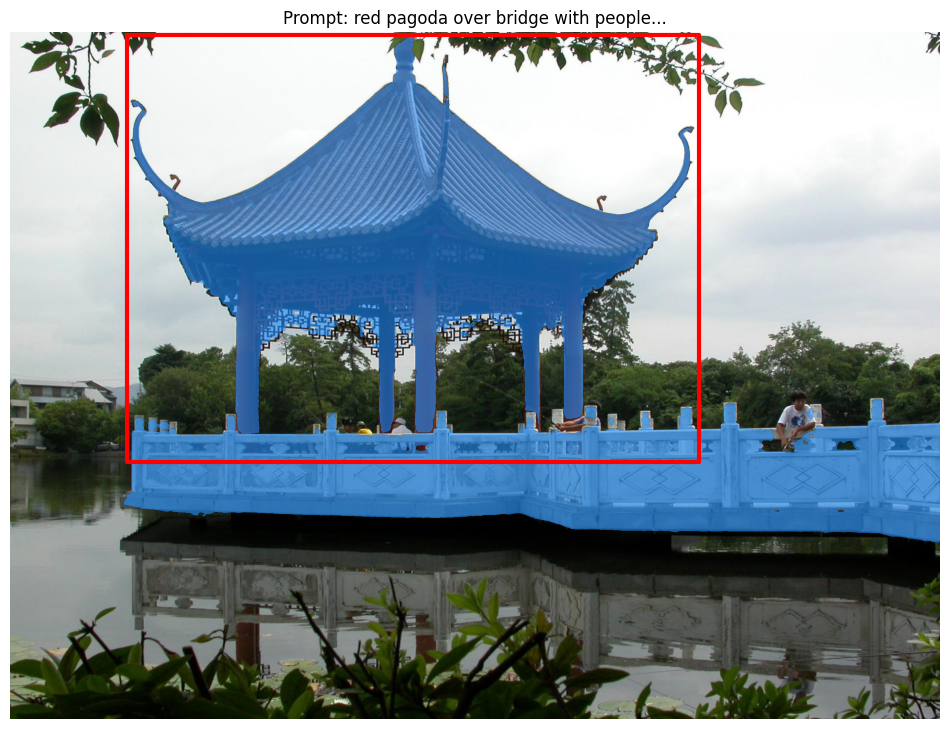

In [ ]:
# --- CELL 5: RUN SINGLE IMAGE ---
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# ================= CẤU HÌNH =================
# 1. Đường dẫn Dataset
DATASET_ROOT = "/content/DIS5K"
OUTPUT_MASK_DIR = "/content/sam2_masks"
os.makedirs(OUTPUT_MASK_DIR, exist_ok=True)

# 2. Đường dẫn GroundingDINO (QUAN TRỌNG: sam2_repo)
GD_REPO = "/content/sam2_repo/GroundingDINO"
GD_CONFIG = os.path.join(GD_REPO, "groundingdino/config/GroundingDINO_SwinT_OGC.py")
GD_WEIGHTS = os.path.join(GD_REPO, "weights/groundingdino_swint_ogc.pth")

# 3. Thông tin ảnh & Prompt
target_item = {
    "img": "DIS-TE4/im/4#Architecture#10#Pavilion#2992459872_d15b21c6f8_o.jpg",
    "prompt": "red pagoda over bridge with people"
}
# ============================================

# --- LOAD GROUNDING DINO ---
if 'gd_model' not in globals():
    print("⏳ Đang tải GroundingDINO...")
    if os.path.exists(GD_REPO):
        import sys
        if GD_REPO not in sys.path:
            sys.path.append(GD_REPO)

    from groundingdino.util.inference import load_model as load_gd_model
    from groundingdino.util.inference import load_image, predict

    if not os.path.exists(GD_WEIGHTS):
        print(f"❌ Lỗi: Thiếu file weight tại {GD_WEIGHTS}")
    else:
        gd_model = load_gd_model(GD_CONFIG, GD_WEIGHTS)
        print("✅ GroundingDINO đã sẵn sàng.")

# --- CÁC HÀM HỖ TRỢ ---
def transform_boxes(boxes, h, w):
    multiplier = torch.tensor([w, h, w, h], device=boxes.device)
    boxes = boxes * multiplier
    boxes_xyxy = torch.zeros_like(boxes)
    boxes_xyxy[:, 0] = boxes[:, 0] - boxes[:, 2]/2
    boxes_xyxy[:, 1] = boxes[:, 1] - boxes[:, 3]/2
    boxes_xyxy[:, 2] = boxes[:, 0] + boxes[:, 2]/2
    boxes_xyxy[:, 3] = boxes[:, 1] + boxes[:, 3]/2
    return boxes_xyxy

def show_result(image, mask, box):
    plt.figure(figsize=(12, 12))
    plt.imshow(image)

    # Hiển thị Mask (Xanh dương)
    if mask is not None:
        color = np.array([30/255, 144/255, 255/255, 0.6])
        h, w = mask.shape[-2:]
        mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
        plt.imshow(mask_image)

    # Vẽ Box (Đỏ)
    if box is not None:
        x0, y0, x1, y1 = box
        plt.plot([x0, x1, x1, x0, x0], [y0, y0, y1, y1, y0], 'r', linewidth=3)

    plt.axis('off')
    plt.title(f"Prompt: {target_item['prompt'][:60]}...", fontsize=12)
    plt.show()

# --- HÀM XỬ LÝ CHÍNH ---
def process_single_image():
    # 1. Kiểm tra biến
    if 'predictor' not in globals():
        print("❌ Lỗi: Chưa chạy Cell 4 (Load SAM 2).")
        return
    if 'gd_model' not in globals():
        print("❌ Lỗi: Chưa load được GroundingDINO.")
        return

    # 2. Tìm ảnh
    rel_path = target_item['img']
    full_path = os.path.join(DATASET_ROOT, rel_path)
    # Check fallback folder
    if not os.path.exists(full_path):
        full_path = os.path.join(DATASET_ROOT, "DIS5K", rel_path)
        if not os.path.exists(full_path):
            print(f"❌ Không tìm thấy ảnh tại: {full_path}")
            return

    print(f"🚀 Đang xử lý ảnh: {rel_path}")

    try:
        # A. GroundingDINO Detect
        image_source, image_tensor = load_image(full_path)
        boxes, _, _ = predict(
            model=gd_model,
            image=image_tensor,
            caption=target_item['prompt'],
            box_threshold=0.35,
            text_threshold=0.25
        )

        if len(boxes) == 0:
            print("⚠️ Không tìm thấy đối tượng nào khớp với prompt.")
            plt.imshow(image_source)
            plt.show()
            return

        print(f"✅ Tìm thấy {len(boxes)} đối tượng.")

        # B. SAM 2 Segment
        h, w, _ = image_source.shape
        boxes_xyxy = transform_boxes(boxes, h, w)
        predictor.set_image(image_source)

        masks, _, _ = predictor.predict(
            point_coords=None,
            point_labels=None,
            box=boxes_xyxy,
            multimask_output=False
        )

        # C. Lưu & Hiển thị
        final_mask = np.any(masks, axis=0).squeeze()

        # Save
        binary_mask = (final_mask * 255).astype(np.uint8)
        save_name = rel_path.replace("/", "_").replace(".jpg", ".png")
        Image.fromarray(binary_mask).save(os.path.join(OUTPUT_MASK_DIR, save_name))

        # Show
        # Lấy box đầu tiên có độ tin cậy cao nhất để vẽ
        show_result(image_source, final_mask, boxes_xyxy[0].cpu().numpy())

    except Exception as e:
        print(f"❌ Lỗi trong quá trình xử lý: {e}")
        import traceback
        traceback.print_exc()

# Chạy
torch.cuda.empty_cache()
process_single_image()

In [ ]:
# --- CELL 6: BATCH PROCESSING (CHẠY TẬP LỚN) ---
import os
import torch
import numpy as np
from PIL import Image
from tqdm import tqdm # Thư viện thanh tiến trình
import cv2

# ================= 1. CẤU HÌNH NGƯỜI DÙNG (CHỈ CẦN SỬA Ở ĐÂY) =================

# Đường dẫn gốc Dataset
DATASET_ROOT = "/content/DIS5K/DIS5K" # Hoặc "/content/DIS5K" tùy cấu trúc giải nén

# Nơi lưu kết quả (Gốc)
OUTPUT_ROOT = "/content/sam2_masks"

# DANH SÁCH CÁC TẬP MUỐN CHẠY
# Bạn có thể thêm bớt tùy ý: ['DIS-VD', 'DIS-TE1', 'DIS-TE2', 'DIS-TE3', 'DIS-TE4']
DATASETS_TO_PROCESS = ['DIS-TE1', 'DIS-TE2', 'DIS-TE3', 'DIS-TE4']

# Cấu hình GroundingDINO
GD_REPO = "/content/sam2_repo/GroundingDINO"
GD_CONFIG = os.path.join(GD_REPO, "groundingdino/config/GroundingDINO_SwinT_OGC.py")
GD_WEIGHTS = os.path.join(GD_REPO, "weights/groundingdino_swint_ogc.pth")

# ==============================================================================

# --- LOAD MODEL (CHỈ LOAD 1 LẦN) ---
# 1. Load GroundingDINO
if 'gd_model' not in globals():
    import sys
    if GD_REPO not in sys.path: sys.path.append(GD_REPO)
    from groundingdino.util.inference import load_model as load_gd_model
    from groundingdino.util.inference import load_image, predict

    print("⏳ Đang tải GroundingDINO...")
    gd_model = load_gd_model(GD_CONFIG, GD_WEIGHTS)
    print("✅ GroundingDINO Ready.")

# 2. Check SAM 2
if 'predictor' not in globals():
    raise RuntimeError("❌ Chưa load SAM 2 (hãy chạy Cell load model trước).")

# --- HÀM TRÍCH XUẤT PROMPT TỰ ĐỘNG ---
def get_prompt_from_filename(filename):
    """
    DIS5K đặt tên theo dạng: ID#Category#...
    Ví dụ: 4#Architecture#10... -> Prompt: "Architecture"
    """
    parts = filename.split('#')
    if len(parts) > 2:
        # Lấy category làm prompt (ví dụ: Architecture, Animal...)
        return parts[1].replace("_", " ")
    else:
        # Fallback nếu tên file không đúng chuẩn
        return "salient object"

def transform_boxes(boxes, h, w):
    multiplier = torch.tensor([w, h, w, h], device=boxes.device)
    boxes = boxes * multiplier
    boxes_xyxy = torch.zeros_like(boxes)
    boxes_xyxy[:, 0] = boxes[:, 0] - boxes[:, 2]/2
    boxes_xyxy[:, 1] = boxes[:, 1] - boxes[:, 3]/2
    boxes_xyxy[:, 2] = boxes[:, 0] + boxes[:, 2]/2
    boxes_xyxy[:, 3] = boxes[:, 1] + boxes[:, 3]/2
    return boxes_xyxy

# --- VÒNG LẶP CHÍNH ---
def process_batch():
    torch.cuda.empty_cache()

    for dataset_name in DATASETS_TO_PROCESS:
        print(f"\n🌊 ĐANG XỬ LÝ TẬP: {dataset_name}")
        print("="*40)

        # 1. Tạo đường dẫn Input/Output
        # Cấu trúc DIS5K thường là: DIS-TE1/im/
        input_dir = os.path.join(DATASET_ROOT, dataset_name, "im")

        # Nếu không tìm thấy, thử tìm trong thư mục con (fallback)
        if not os.path.exists(input_dir):
            input_dir = os.path.join(DATASET_ROOT, dataset_name) # Một số bản dataset không có folder 'im'

        # Tạo thư mục output riêng: sam2_masks/DIS-TE1
        save_dir = os.path.join(OUTPUT_ROOT, dataset_name)
        os.makedirs(save_dir, exist_ok=True)

        if not os.path.exists(input_dir):
            print(f"⚠️ Bỏ qua {dataset_name}: Không tìm thấy đường dẫn {input_dir}")
            continue

        # 2. Lấy danh sách ảnh
        image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        print(f"   📂 Tìm thấy {len(image_files)} ảnh.")

        # 3. Duyệt từng ảnh (Dùng tqdm để hiện thanh tiến trình)
        for img_name in tqdm(image_files, desc=f"Processing {dataset_name}"):
            img_path = os.path.join(input_dir, img_name)
            save_path = os.path.join(save_dir, img_name.replace(".jpg", ".png"))

            # Nếu đã xử lý rồi thì bỏ qua (Resume)
            if os.path.exists(save_path):
                continue

            try:
                # --- A. Tạo Prompt ---
                prompt_text = get_prompt_from_filename(img_name)

                # --- B. GroundingDINO ---
                image_source, image_tensor = load_image(img_path)
                boxes, logits, _ = predict(
                    model=gd_model,
                    image=image_tensor,
                    caption=prompt_text,
                    box_threshold=0.3,  # Giảm nhẹ threshold để bắt tốt hơn
                    text_threshold=0.25
                )

                if len(boxes) == 0:
                    # Nếu không tìm thấy bằng Category, thử prompt chung
                    boxes, _, _ = predict(model=gd_model, image=image_tensor, caption="main object", box_threshold=0.25, text_threshold=0.25)
                    if len(boxes) == 0:
                        # Vẫn không thấy -> Lưu mask đen (trống)
                        h, w, _ = image_source.shape
                        blank_mask = np.zeros((h, w), dtype=np.uint8)
                        Image.fromarray(blank_mask).save(save_path)
                        continue

                # --- C. SAM 2 ---
                h, w, _ = image_source.shape
                boxes_xyxy = transform_boxes(boxes, h, w)

                predictor.set_image(image_source)

                # Dự đoán mask cho tất cả các box tìm được
                masks, scores, _ = predictor.predict(
                    point_coords=None,
                    point_labels=None,
                    box=boxes_xyxy,
                    multimask_output=False
                )

                # --- D. Gộp Mask & Lưu ---
                # Gộp tất cả các mask của các đối tượng lại thành 1 mask duy nhất
                if masks.ndim == 4: # (N_boxes, 1, H, W)
                     masks = masks.squeeze(1)

                # Dùng phép OR logic để gộp mask: object 1 OR object 2 ...
                final_mask = np.any(masks, axis=0)

                binary_mask = (final_mask * 255).astype(np.uint8)
                Image.fromarray(binary_mask).save(save_path)

            except Exception as e:
                print(f"❌ Lỗi ảnh {img_name}: {e}")
                continue

        print(f"✅ Hoàn tất tập {dataset_name}. Kết quả lưu tại: {save_dir}")

# Chạy
process_batch()


🌊 ĐANG XỬ LÝ TẬP: DIS-TE1
   📂 Tìm thấy 500 ảnh.


Processing DIS-TE1: 100%|██████████| 500/500 [08:14<00:00,  1.01it/s]


✅ Hoàn tất tập DIS-TE1. Kết quả lưu tại: /content/sam2_masks/DIS-TE1

🌊 ĐANG XỬ LÝ TẬP: DIS-TE2
   📂 Tìm thấy 500 ảnh.


Processing DIS-TE2: 100%|██████████| 500/500 [08:32<00:00,  1.02s/it]


✅ Hoàn tất tập DIS-TE2. Kết quả lưu tại: /content/sam2_masks/DIS-TE2

🌊 ĐANG XỬ LÝ TẬP: DIS-TE3
   📂 Tìm thấy 500 ảnh.


Processing DIS-TE3: 100%|██████████| 500/500 [09:25<00:00,  1.13s/it]


✅ Hoàn tất tập DIS-TE3. Kết quả lưu tại: /content/sam2_masks/DIS-TE3

🌊 ĐANG XỬ LÝ TẬP: DIS-TE4
   📂 Tìm thấy 500 ảnh.


Processing DIS-TE4: 100%|██████████| 500/500 [10:21<00:00,  1.24s/it]

✅ Hoàn tất tập DIS-TE4. Kết quả lưu tại: /content/sam2_masks/DIS-TE4


In [ ]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# 2. Kiểm tra folder tồn tại
!ls
# 3. Zip toàn bộ folder eval_results
!zip -r sam2_masks.zip sam2_masks
# 4. Move file zip vào Google Drive
!mv sam2_masks.zip /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DIS5K  DIS5K.zip  drive  sam2_masks  sam2_repo	sample_data
  adding: sam2_masks/ (stored 0%)
  adding: sam2_masks/DIS-TE3/ (stored 0%)
  adding: sam2_masks/DIS-TE3/6#Automobile#11#Tractor#8582685987_0f406af515_o.png (deflated 5%)
  adding: sam2_masks/DIS-TE3/11#Furniture#10#Hammock#2274347371_ca744b4220_o.png (deflated 14%)
  adding: sam2_masks/DIS-TE3/21#Tool#18#Umbrella#1427576181_678ca9dd9b_o.png (deflated 16%)
  adding: sam2_masks/DIS-TE3/6#Automobile#9#Motorcycle#15951454110_1a7164ed24_o.png (deflated 16%)
  adding: sam2_masks/DIS-TE3/21#Tool#5#Hook#20898548453_8b31d81b01_o.png (deflated 5%)
  adding: sam2_masks/DIS-TE3/17#Non-motor Vehicle#4#Cart#4776627829_94699a02a5_o.png (deflated 21%)
  adding: sam2_masks/DIS-TE3/13#Insect#11#Spider#8581689825_7bec07e515_o.png (deflated 22%)
  adding: sam2_masks/DIS-TE3/21#Tool#13#Stethoscope#28360822976_7ab297bc1c_

In [ ]:
import os
import cv2
import numpy as np
from sklearn.metrics import mean_absolute_error, f1_score, precision_recall_curve
from skimage.metrics import structural_similarity as ssim
from tqdm import tqdm

# --- 1. CẤU HÌNH ĐƯỜNG DẪN ---
PRED_DIR = "/content/sam2_masks/DIS-TE1"
GT_DIR_INPUT = "/content/DIS5K/DIS5K/DIS-TE1/gt"

# Tự động tìm thư mục GT
if os.path.exists(GT_DIR_INPUT):
    GT_DIR = GT_DIR_INPUT
elif os.path.exists("/content/DIS5K/DIS-TE1/gt"):
    GT_DIR = "/content/DIS5K/DIS-TE1/gt"
else:
    print("❌ Không tìm thấy thư mục GT.")
    GT_DIR = None

# ==============================================================================
# 2. CÁC HÀM TÍNH TOÁN METRICS NÂNG CAO
# ==============================================================================

def calculate_boundary_iou(gt_mask, pred_mask, dilation_ratio=0.02):
    """
    Tính Boundary IoU: Chỉ so sánh vùng biên của vật thể.
    Input: Ảnh nhị phân (0 hoặc 1), dạng 2D numpy array.
    """
    # Lấy kích thước đường chéo ảnh để xác định độ dày đường biên
    h, w = gt_mask.shape
    diagonal = np.sqrt(h**2 + w**2)
    dilation = int(round(dilation_ratio * diagonal))
    if dilation < 1: dilation = 1

    # Tạo kernel để giãn nở (Dilation)
    kernel = np.ones((3, 3), dtype=np.uint8)

    # Hàm lấy đường biên: Mask gốc - Mask bị co nhỏ (Erosion)
    def get_boundary(mask):
        padded_mask = cv2.copyMakeBorder(mask, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
        eroded_mask = cv2.erode(padded_mask, kernel, iterations=dilation)
        # Cắt bỏ phần padding để về kích thước gốc
        eroded_mask = eroded_mask[1:h+1, 1:w+1]
        return mask - eroded_mask

    gt_boundary = get_boundary(gt_mask)
    pred_boundary = get_boundary(pred_mask)

    intersection = ((gt_boundary * pred_boundary) > 0).sum()
    union = ((gt_boundary + pred_boundary) > 0).sum()

    if union == 0: return 0.0
    return intersection / union

def calculate_structure_measure(pred_prob, gt_mask):
    """
    Tính Structure Measure (S-measure): Kết hợp Region-aware và Object-aware SSIM.
    Input:
      - pred_prob: Ảnh dự đoán (Probability Map 0.0-1.0)
      - gt_mask: Ảnh GT (Binary 0-1)
    """
    alpha = 0.5
    y = gt_mask.mean()
    if y == 0: # GT hoàn toàn đen -> Score = 1 - mean(Pred)
        return 1.0 - pred_prob.mean()
    elif y == 1: # GT hoàn toàn trắng -> Score = mean(Pred)
        return pred_prob.mean()

    # 1. Object-aware Structural Similarity (S_o) -> Dùng SSIM toàn cục
    # (Trong paper gốc dùng công thức biến thể, ở đây dùng SSIM chuẩn làm xấp xỉ tốt nhất)
    s_object = ssim(pred_prob, gt_mask.astype(float), data_range=1.0)

    # 2. Region-aware Structural Similarity (S_r)
    # Chia ảnh thành 4 khối dựa trên trọng tâm (Centroid) của GT
    M = cv2.moments(gt_mask)
    if M["m00"] == 0:
        cx, cy = gt_mask.shape[1]//2, gt_mask.shape[0]//2
    else:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])

    # Đảm bảo trọng tâm nằm trong ảnh
    w, h = gt_mask.shape[1], gt_mask.shape[0]
    cx = np.clip(cx, 1, w-1)
    cy = np.clip(cy, 1, h-1)

    # Cắt 4 vùng (Top-Left, Top-Right, Bottom-Left, Bottom-Right)
    # Tính SSIM cho từng vùng và cộng gộp có trọng số
    ssims = []
    weights = []

    regions = [
        (slice(0, cy), slice(0, cx)),   # TL
        (slice(0, cy), slice(cx, w)),   # TR
        (slice(cy, h), slice(0, cx)),   # BL
        (slice(cy, h), slice(cx, w))    # BR
    ]

    for r_slice in regions:
        gt_part = gt_mask[r_slice]
        pred_part = pred_prob[r_slice]

        # Nếu vùng quá nhỏ (< 7x7) thì SSIM lỗi, ta gán bằng tương quan đơn giản
        if gt_part.shape[0] < 7 or gt_part.shape[1] < 7:
             part_score = 1.0 - abs(gt_part.mean() - pred_part.mean())
        else:
             part_score = ssim(pred_part, gt_part.astype(float), data_range=1.0)

        # Trọng số dựa trên tỷ lệ diện tích foreground trong vùng đó
        w_k = gt_part.sum() / (gt_mask.sum() + 1e-8)

        ssims.append(part_score)
        weights.append(w_k)

    s_region = np.sum(np.array(ssims) * np.array(weights))

    return alpha * s_object + (1 - alpha) * s_region

# ==============================================================================
# 3. HÀM CHÍNH (MAIN LOOP)
# ==============================================================================

def calculate_full_metrics():
    if GT_DIR is None: return

    pred_files = [f for f in os.listdir(PRED_DIR) if f.endswith('.png')]

    # Các list lưu kết quả
    mae_list = []
    weighted_f1_list = []
    max_f_list = []
    s_measure_list = []     # Mới
    boundary_iou_list = []  # Mới

    print(f"🚀 Đang tính toán 5 chỉ số (MAE, wF1, MaxF, S-measure, BoundaryIoU)...")
    print("-" * 50)

    for pred_name in tqdm(pred_files):
        # --- A. Tìm file GT ---
        if "_im_" in pred_name:
            gt_name = pred_name.split("_im_")[-1]
        else:
            gt_name = pred_name
        gt_path = os.path.join(GT_DIR, gt_name)
        pred_path = os.path.join(PRED_DIR, pred_name)

        if not os.path.exists(gt_path):
            gt_name_alt = gt_name.replace(".jpg", ".png")
            gt_path_alt = os.path.join(GT_DIR, gt_name_alt)
            if os.path.exists(gt_path_alt): gt_path = gt_path_alt
            else: continue

        # --- B. Đọc ảnh ---
        mask_pred = cv2.imread(pred_path, 0)
        mask_gt = cv2.imread(gt_path, 0)
        if mask_pred is None or mask_gt is None: continue

        # --- C. Chuẩn hóa kích thước ---
        if mask_pred.shape != mask_gt.shape:
            mask_pred = cv2.resize(mask_pred, (mask_gt.shape[1], mask_gt.shape[0]), interpolation=cv2.INTER_NEAREST)

        # --- D. Tiền xử lý dữ liệu ---
        # 1. Dạng xác suất (0.0 - 1.0) -> Dùng cho MAE, Max-F, S-measure
        y_pred_prob = mask_pred.astype(np.float32) / 255.0
        y_gt_binary = (mask_gt.astype(np.float32) / 255.0) > 0.5 # True/False mask

        # 2. Dạng nhị phân (0, 1) -> Dùng cho Weighted F1, Boundary IoU
        y_pred_bin = (y_pred_prob > 0.5).astype(np.uint8) # 0, 1 int
        y_gt_bin_int = y_gt_binary.astype(np.uint8)       # 0, 1 int

        # 3. Dạng phẳng (1D) -> Dùng cho Scikit-learn cơ bản
        y_gt_flat = y_gt_bin_int.flatten()
        y_pred_bin_flat = y_pred_bin.flatten()

        # --- E. TÍNH TOÁN 5 CHỈ SỐ ---

        # 1. MAE
        val_mae = mean_absolute_error(y_gt_flat, y_pred_prob.flatten())
        mae_list.append(val_mae)

        # 2. Weighted F1
        val_wf1 = f1_score(y_gt_flat, y_pred_bin_flat, average='weighted')
        weighted_f1_list.append(val_wf1)

        # 3. Max F-measure
        precision, recall, _ = precision_recall_curve(y_gt_flat, y_pred_prob.flatten())
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
        max_f_list.append(np.max(f1_scores))

        # 4. Structure Measure (S-measure) [MỚI]
        # Lưu ý: Truyền vào 2D array
        val_sm = calculate_structure_measure(y_pred_prob, y_gt_bin_int)
        s_measure_list.append(val_sm)

        # 5. Boundary IoU [MỚI]
        # Lưu ý: Truyền vào 2D Binary Mask (0, 1)
        val_biou = calculate_boundary_iou(y_gt_bin_int, y_pred_bin)
        boundary_iou_list.append(val_biou)

    # --- 3. KẾT QUẢ ---
    if len(mae_list) > 0:
        print("-" * 60)
        print(f"✅ KẾT QUẢ ĐÁNH GIÁ TRÊN {len(mae_list)} ẢNH:")
        print(f"1. 📉 MAE (Mean Absolute Error):  {np.mean(mae_list):.4f} (Thấp = Tốt)")
        print(f"2. 📈 Weighted F1-Score:          {np.mean(weighted_f1_list):.4f}")
        print(f"3. 🏆 Max F-measure:              {np.mean(max_f_list):.4f}")
        print(f"4. 🏗️  Structure Measure (Sm):     {np.mean(s_measure_list):.4f} (Cao = Tốt)")
        print(f"5. ✂️  Boundary IoU:               {np.mean(boundary_iou_list):.4f} (Cao = Tốt)")
        print("-" * 60)
    else:
        print("❌ Không có dữ liệu để tính.")

# Chạy
calculate_full_metrics()

🚀 Đang tính toán 5 chỉ số (MAE, wF1, MaxF, S-measure, BoundaryIoU)...
--------------------------------------------------


100%|██████████| 500/500 [26:41<00:00,  3.20s/it]

------------------------------------------------------------
✅ KẾT QUẢ ĐÁNH GIÁ TRÊN 500 ẢNH:
1. 📉 MAE (Mean Absolute Error):  0.1440 (Thấp = Tốt)
2. 📈 Weighted F1-Score:          0.8645
3. 🏆 Max F-measure:              0.6259
4. 🏗️  Structure Measure (Sm):     0.8303 (Cao = Tốt)
5. ✂️  Boundary IoU:               0.4599 (Cao = Tốt)
------------------------------------------------------------


In [ ]:
# Dán nguyên block này vào một cell Colab và chạy
# (Không cần main(), sẽ chạy ngay khi cell thực thi)

import os
import csv
import math
import warnings
from typing import Tuple, List

import cv2
import numpy as np
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error, f1_score, precision_recall_curve
from skimage.metrics import structural_similarity as ssim

# ---------------------------
# CONFIG - chỉnh phần này
# ---------------------------
DATASET_ROOT = "/content"  # root chứa sam2_masks và DIS5K
RESULT_ROOT = os.path.join(DATASET_ROOT, "eval_results")

SUBSETS = {
    "DIS-TE1": {
        "pred": os.path.join(DATASET_ROOT, "sam2_masks", "DIS-TE1"),
        "gt":   os.path.join(DATASET_ROOT, "DIS5K", "DIS5K", "DIS-TE1", "gt")
    },
    "DIS-TE2": {
        "pred": os.path.join(DATASET_ROOT, "sam2_masks", "DIS-TE2"),
        "gt":   os.path.join(DATASET_ROOT, "DIS5K", "DIS5K", "DIS-TE2", "gt")
    },
    "DIS-TE3": {
        "pred": os.path.join(DATASET_ROOT, "sam2_masks", "DIS-TE3"),
        "gt":   os.path.join(DATASET_ROOT, "DIS5K", "DIS5K", "DIS-TE3", "gt")
    },
    "DIS-TE4": {
        "pred": os.path.join(DATASET_ROOT, "sam2_masks", "DIS-TE4"),
        "gt":   os.path.join(DATASET_ROOT, "DIS5K", "DIS5K", "DIS-TE4", "gt")
    }
}

# Nếu muốn chỉ chạy subset con: đặt danh sách ở đây (ví dụ ["DIS-TE4"])
LIST_SUBSETS = None  # None => chạy tất cả SUBSETS keys

# Tham số cho boundary IoU
BOUNDARY_DILATION_RATIO = 0.02  # tỷ lệ so với đường chéo ảnh

# ---------------------------
# Helpers & metrics
# ---------------------------
def ensure_dir(path: str):
    os.makedirs(path, exist_ok=True)

def safe_ssim(a: np.ndarray, b: np.ndarray) -> float:
    """Wrapper cho skimage.metrics.ssim với fallback nếu xảy ra lỗi."""
    try:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            val = ssim(a, b, data_range=1.0)
        if not np.isfinite(val):
            raise ValueError("ssim returned non-finite")
        return float(max(0.0, min(1.0, val)))
    except Exception:
        a_f = a.flatten()
        b_f = b.flatten()
        a_mean = float(np.mean(a_f))
        b_mean = float(np.mean(b_f))
        mean_diff_term = 1.0 - min(1.0, abs(a_mean - b_mean))
        try:
            if a_f.size > 1 and np.std(a_f) > 0 and np.std(b_f) > 0:
                corr = float(np.corrcoef(a_f, b_f)[0, 1])
            else:
                corr = 0.0
        except Exception:
            corr = 0.0
        corr = max(-1.0, min(1.0, corr))
        corr_term = 0.5 * (corr + 1.0)
        score = 0.6 * mean_diff_term + 0.4 * corr_term
        return float(max(0.0, min(1.0, score)))

def calculate_boundary_iou(gt_mask: np.ndarray, pred_mask: np.ndarray,
                           dilation_ratio: float = BOUNDARY_DILATION_RATIO) -> float:
    """Tính Boundary IoU giữa 2 mask nhị phân (0/1)."""
    gt = (gt_mask > 0).astype(np.uint8)
    pred = (pred_mask > 0).astype(np.uint8)
    h, w = gt.shape
    diagonal = math.sqrt(max(h, 1) ** 2 + max(w, 1) ** 2)
    dilation = max(1, int(round(dilation_ratio * diagonal)))
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

    def get_boundary(mask: np.ndarray) -> np.ndarray:
        padded = cv2.copyMakeBorder(mask, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0).astype(np.uint8)
        eroded = cv2.erode(padded, kernel, iterations=dilation)
        eroded = eroded[1:h+1, 1:w+1]
        boundary = (mask.astype(np.int16) - eroded.astype(np.int16)) > 0
        return boundary.astype(np.uint8)

    gt_b = get_boundary(gt)
    pred_b = get_boundary(pred)
    inter = int(np.sum((gt_b & pred_b) > 0))
    union = int(np.sum((gt_b | pred_b) > 0))
    if union == 0:
        return 0.0
    return inter / union

def calculate_structure_measure(pred_prob: np.ndarray, gt_mask: np.ndarray) -> float:
    """Tính S-measure (approximation)."""
    alpha = 0.5
    y = float(np.mean(gt_mask))
    if y == 0.0:
        return 1.0 - float(np.mean(pred_prob))
    if y == 1.0:
        return float(np.mean(pred_prob))

    s_object = safe_ssim(pred_prob.astype(np.float32), gt_mask.astype(np.float32))

    M = cv2.moments((gt_mask > 0).astype(np.uint8))
    if M["m00"] == 0:
        cx = pred_prob.shape[1] // 2
        cy = pred_prob.shape[0] // 2
    else:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])

    w, h = pred_prob.shape[1], pred_prob.shape[0]
    cx = int(np.clip(cx, 1, max(w - 1, 1)))
    cy = int(np.clip(cy, 1, max(h - 1, 1)))

    regions = [
        (slice(0, cy), slice(0, cx)),
        (slice(0, cy), slice(cx, w)),
        (slice(cy, h), slice(0, cx)),
        (slice(cy, h), slice(cx, w))
    ]

    ssims = []
    weights = []
    gt_sum = float(np.sum(gt_mask)) + 1e-8
    for r in regions:
        gt_part = gt_mask[r].astype(np.float32)
        pred_part = pred_prob[r].astype(np.float32)
        if gt_part.size == 0:
            continue
        if gt_part.shape[0] < 7 or gt_part.shape[1] < 7:
            part_score = 1.0 - abs(float(np.mean(gt_part)) - float(np.mean(pred_part)))
        else:
            part_score = safe_ssim(pred_part, gt_part)
        w_k = float(np.sum(gt_part)) / gt_sum
        ssims.append(part_score)
        weights.append(w_k)

    s_region = float(np.sum(np.array(ssims) * np.array(weights))) if len(ssims) > 0 else 0.0
    return float(alpha * s_object + (1.0 - alpha) * s_region)

# ---------------------------
# Matching GT & evaluation
# ---------------------------
def match_gt_path(gt_dir: str, pred_name: str) -> str:
    """Thử nhiều cách match tên file GT cho một file pred."""
    candidates = []
    if "_im_" in pred_name:
        candidates.append(pred_name.split("_im_")[-1])
    candidates.append(pred_name)
    base = os.path.splitext(pred_name)[0]
    candidates.extend([base + ext for ext in (".png", ".jpg", ".jpeg")])
    for name in candidates:
        p = os.path.join(gt_dir, name)
        if os.path.exists(p):
            return p
    base_only = os.path.splitext(pred_name)[0]
    for f in os.listdir(gt_dir):
        if os.path.splitext(f)[0] == base_only:
            return os.path.join(gt_dir, f)
    return None

def evaluate_subset(pred_dir: str, gt_dir: str, subset_name: str) -> Tuple[List[dict], List[str]]:
    """Đánh giá toàn bộ ảnh trong pred_dir so với gt_dir; trả về rows và lỗi."""
    rows = []
    errors = []
    if not os.path.isdir(pred_dir):
        errors.append(f"PRED_DIR không tồn tại: {pred_dir}")
        return rows, errors
    if not os.path.isdir(gt_dir):
        errors.append(f"GT_DIR không tồn tại: {gt_dir}")
        return rows, errors

    pred_files = [f for f in os.listdir(pred_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if len(pred_files) == 0:
        errors.append(f"Không tìm được file ảnh trong {pred_dir}")
        return rows, errors

    for pred_name in tqdm(sorted(pred_files), desc=f"Evaluating {subset_name}", unit="img"):
        pred_path = os.path.join(pred_dir, pred_name)
        gt_path = match_gt_path(gt_dir, pred_name)
        if gt_path is None:
            errors.append(f"[{pred_name}] Không tìm GT tương ứng.")
            continue

        try:
            pred_raw = cv2.imread(pred_path, cv2.IMREAD_GRAYSCALE)
            gt_raw = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)
            if pred_raw is None or gt_raw is None:
                errors.append(f"[{pred_name}] Không đọc được ảnh (None). pred={pred_path}, gt={gt_path}")
                continue

            if pred_raw.shape != gt_raw.shape:
                pred_raw = cv2.resize(pred_raw, (gt_raw.shape[1], gt_raw.shape[0]), interpolation=cv2.INTER_LINEAR)

            pred_prob = (pred_raw.astype(np.float32) / 255.0).clip(0.0, 1.0)
            gt_prob = (gt_raw.astype(np.float32) / 255.0).clip(0.0, 1.0)
            gt_bin = (gt_prob > 0.5).astype(np.uint8)
            pred_bin = (pred_prob > 0.5).astype(np.uint8)

            y_gt_flat = gt_bin.flatten()
            y_pred_prob_flat = pred_prob.flatten()
            y_pred_bin_flat = pred_bin.flatten()

            mae_v = float(mean_absolute_error(y_gt_flat, y_pred_prob_flat))

            try:
                wf1_v = float(f1_score(y_gt_flat, y_pred_bin_flat, average='weighted', zero_division=0))
            except Exception:
                wf1_v = 0.0

            try:
                f1_fore = float(f1_score(y_gt_flat, y_pred_bin_flat, average='binary', zero_division=0))
            except Exception:
                f1_fore = float(f1_score(y_gt_flat, y_pred_bin_flat, average='macro', zero_division=0))

            if np.unique(y_gt_flat).size < 2:
                maxf_v = float(f1_fore)
            else:
                try:
                    precision, recall, _ = precision_recall_curve(y_gt_flat, y_pred_prob_flat)
                    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
                    maxf_v = float(np.nanmax(f1_scores))
                except Exception:
                    maxf_v = float(f1_fore)

            s_v = float(calculate_structure_measure(pred_prob, gt_bin))
            b_v = float(calculate_boundary_iou(gt_bin, pred_bin))

            rows.append({
                "image": pred_name,
                "gt_path": os.path.basename(gt_path),
                "mae": mae_v,
                "weighted_f1": wf1_v,
                "f1_foreground": f1_fore,
                "max_f": maxf_v,
                "s_measure": s_v,
                "boundary_iou": b_v
            })
        except Exception as e:
            errors.append(f"[{pred_name}] Exception: {repr(e)}")
            continue

    return rows, errors

def save_rows_to_csv(rows: List[dict], csv_path: str):
    ensure_dir(os.path.dirname(csv_path))
    if len(rows) == 0:
        with open(csv_path, "w", newline="") as f:
            f.write("")
        return
    keys = list(rows[0].keys())
    with open(csv_path, "w", newline="") as f:
        writer = csv.DictWriter(f, fieldnames=keys)
        writer.writeheader()
        for r in rows:
            writer.writerow(r)

def save_errors(errors: List[str], path: str):
    ensure_dir(os.path.dirname(path))
    with open(path, "w", encoding="utf-8") as f:
        for e in errors:
            f.write(e + "\n")

# ---------------------------
# Run all subsets (no main)
# ---------------------------
ensure_dir(RESULT_ROOT)
subsets_to_run = LIST_SUBSETS if LIST_SUBSETS is not None else list(SUBSETS.keys())
overall_summary = []

for subset in subsets_to_run:
    if subset not in SUBSETS:
        print(f"[WARN] Subset '{subset}' không được cấu hình trong SUBSETS, bỏ qua.")
        continue
    pred_dir = SUBSETS[subset]["pred"]
    gt_dir = SUBSETS[subset]["gt"]
    print(f"\n=== Running subset: {subset} ===")
    print(f"PRED_DIR = {pred_dir}")
    print(f"GT_DIR   = {gt_dir}")

    rows, errors = evaluate_subset(pred_dir, gt_dir, subset)
    subset_result_dir = os.path.join(RESULT_ROOT, subset)
    ensure_dir(subset_result_dir)

    csv_path = os.path.join(subset_result_dir, f"{subset}_results.csv")
    save_rows_to_csv(rows, csv_path)

    err_path = os.path.join(subset_result_dir, f"{subset}_errors.txt")
    save_errors(errors, err_path)

    if len(rows) > 0:
        mean_mae = float(np.mean([r["mae"] for r in rows]))
        mean_wf1 = float(np.mean([r["weighted_f1"] for r in rows]))
        mean_f1fore = float(np.mean([r["f1_foreground"] for r in rows]))
        mean_maxf = float(np.mean([r["max_f"] for r in rows]))
        mean_sm = float(np.mean([r["s_measure"] for r in rows]))
        mean_biou = float(np.mean([r["boundary_iou"] for r in rows]))
        n = len(rows)
        overall_summary.append({
            "subset": subset,
            "n_images": n,
            "mae": mean_mae,
            "weighted_f1": mean_wf1,
            "f1_foreground": mean_f1fore,
            "max_f": mean_maxf,
            "s_measure": mean_sm,
            "boundary_iou": mean_biou,
            "errors": len(errors)
        })
        print(f"-> Done. {n} images. MAE={mean_mae:.4f}, WF1={mean_wf1:.4f}, MaxF={mean_maxf:.4f}, S={mean_sm:.4f}, BIoU={mean_biou:.4f}")
    else:
        overall_summary.append({
            "subset": subset,
            "n_images": 0,
            "mae": None,
            "weighted_f1": None,
            "f1_foreground": None,
            "max_f": None,
            "s_measure": None,
            "boundary_iou": None,
            "errors": len(errors)
        })
        print("-> No valid images processed for this subset.")

# Save overall summary
summary_csv = os.path.join(RESULT_ROOT, "summary.csv")
if overall_summary:
    keys = ["subset", "n_images", "mae", "weighted_f1", "f1_foreground", "max_f", "s_measure", "boundary_iou", "errors"]
    with open(summary_csv, "w", newline="", encoding="utf-8") as f:
        writer = csv.DictWriter(f, fieldnames=keys)
        writer.writeheader()
        for r in overall_summary:
            writer.writerow(r)
    print(f"\nSummary saved to: {summary_csv}")
else:
    print("\nNo subsets processed; no summary created.")



=== Running subset: DIS-TE1 ===
PRED_DIR = /content/sam2_masks/DIS-TE1
GT_DIR   = /content/DIS5K/DIS5K/DIS-TE1/gt


Evaluating DIS-TE1: 100%|██████████| 500/500 [37:38<00:00,  4.52s/img]


-> Done. 500 images. MAE=0.1440, WF1=0.8645, MaxF=0.6259, S=0.8303, BIoU=0.4599

=== Running subset: DIS-TE2 ===
PRED_DIR = /content/sam2_masks/DIS-TE2
GT_DIR   = /content/DIS5K/DIS5K/DIS-TE2/gt


Evaluating DIS-TE2: 100%|██████████| 500/500 [45:08<00:00,  5.42s/img]


-> Done. 500 images. MAE=0.1346, WF1=0.8690, MaxF=0.6970, S=0.8357, BIoU=0.5106

=== Running subset: DIS-TE3 ===
PRED_DIR = /content/sam2_masks/DIS-TE3
GT_DIR   = /content/DIS5K/DIS5K/DIS-TE3/gt


Evaluating DIS-TE3: 100%|██████████| 500/500 [51:59<00:00,  6.24s/img]


-> Done. 500 images. MAE=0.1435, WF1=0.8573, MaxF=0.6727, S=0.8223, BIoU=0.4701

=== Running subset: DIS-TE4 ===
PRED_DIR = /content/sam2_masks/DIS-TE4
GT_DIR   = /content/DIS5K/DIS5K/DIS-TE4/gt


Evaluating DIS-TE4: 100%|██████████| 500/500 [1:01:14<00:00,  7.35s/img]

-> Done. 500 images. MAE=0.1925, WF1=0.8101, MaxF=0.6252, S=0.7593, BIoU=0.3934

Summary saved to: /content/eval_results/summary.csv


In [ ]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# 2. Kiểm tra folder tồn tại
!ls
# 3. Zip toàn bộ folder eval_results
!zip -r eval_results.zip eval_results
# 4. Move file zip vào Google Drive
!mv eval_results.zip /content/drive/MyDrive/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DIS5K  DIS5K.zip  drive  eval_results  sam2_masks  sam2_repo  sample_data
  adding: eval_results/ (stored 0%)
  adding: eval_results/DIS-TE3/ (stored 0%)
  adding: eval_results/DIS-TE3/DIS-TE3_results.csv (deflated 64%)
  adding: eval_results/DIS-TE3/DIS-TE3_errors.txt (stored 0%)
  adding: eval_results/summary.csv (deflated 43%)
  adding: eval_results/DIS-TE4/ (stored 0%)
  adding: eval_results/DIS-TE4/DIS-TE4_results.csv (deflated 64%)
  adding: eval_results/DIS-TE4/DIS-TE4_errors.txt (stored 0%)
  adding: eval_results/DIS-TE1/ (stored 0%)
  adding: eval_results/DIS-TE1/DIS-TE1_results.csv (deflated 64%)
  adding: eval_results/DIS-TE1/DIS-TE1_errors.txt (stored 0%)
  adding: eval_results/DIS-TE2/ (stored 0%)
  adding: eval_results/DIS-TE2/DIS-TE2_results.csv (deflated 64%)
  adding: eval_results/DIS-TE2/DIS-TE2_errors.txt (stored 0%)
